In [44]:
#task is to predict if it is poisonous or not based on it attributes given 

#import all the dependencies
import pandas as pd #need pandas to store data and dataframe 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder #to convert strings to numbers
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC #support vector classifier
from sklearn.metrics import classification_report #evaluation matrix

from ctypes import PyDLL
import pandas as pd #need pandas to store data and dataframe 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder #to convert strings to numbers
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC #support vector classifier
from sklearn.metrics import classification_report #evaluation matrix 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPClassifier

enc = OrdinalEncoder()
X = dataset.drop('edible', axis=1) #corresponding attributes 
y = dataset['edible'] #corresponding label (trying to predict)
#print(x.head)
#print(y.head)
y = y.values.reshape(-1,1)

encodedx = enc.fit_transform(X)
#print(encodedx)
encodedy = enc.fit_transform(y)
#print(encodedy[0:15])

#training and testing division 
x_train, x_test, y_train, y_test = train_test_split(encodedx, encodedy, test_size=0.20)
y_train = np.ravel(y_train)

#SCALING--------------------------------------------------------------------------------------------------------
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)




##SVM ----------------------------------------------------------------------------------------------------------
#support vector classifier class for classification 
#gamma
#c = cost 
svclassifier = SVC(kernel='poly', C=0.1, gamma=1)
svclassifier.fit(x_train, y_train)

#predict classes
y_pred = svclassifier.predict(x_test)

#evaluation of one training set --------------------------------------------------------------------------------
#evaluation of the model
    #print(classification_report(y_test, y_pred))


#from sklearn.model_selection import GridSearchCV
 
# defining parameter range
#param_grid = {'C': [0.1, 1, 10],
     #         'gamma': [1, 0.1, 0.01],
      #        'kernel': ['poly']}
 
#grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv = 10)
 
# fitting the model for grid search
#grid.fit(x_train, y_train) 
# print best parameter after tuning
#print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
#print(grid.best_estimator_)





In [45]:

import time
start_time = time.time()


#cross validation score ----------------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
encodedy = np.ravel(encodedy)
cv_scores = cross_val_score(svclassifier, encodedx, encodedy, cv =10)
print(cv_scores)
print('sv_scores.mean:{}'.format(np.mean(cv_scores)))

print("--- %s seconds ---" % (time.time() - start_time))


[0.68511685 1.         1.         1.         1.         1.
 1.         1.         0.77463054 1.        ]
sv_scores.mean:0.9459747393040432
--- 1.9393668174743652 seconds ---


In [46]:
import pandas as pd 

names = ["edible","cap-shape","cap-surface", "cap-color","bruises","odor","gill-attachment","gill-spacing","gill-size","gill-color","stalk-shape","stalk-root","stalk-surface-above-ring","stock-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","viel-type","viel-color","ring number","ring-type","spore-print-color","population","habitat"]

dataset = pd.read_csv('mush.csv',names = names)

from ctypes import PyDLL
import pandas as pd #need pandas to store data and dataframe 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder #to convert strings to numbers
from sklearn.tree import DecisionTreeClassifier #DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC #support vector classifier
from sklearn.metrics import classification_report #evaluation matrix 
from sklearn.metrics import accuracy_score #accuracy score
from sklearn.model_selection import GridSearchCV

enc = OrdinalEncoder()
X = dataset.drop('edible', axis=1) #corresponding attributes 
y = dataset['edible'] #corresponding label (trying to predict)
#print(x.head)
#print(y.head)
y = y.values.reshape(-1,1)

encodedx = enc.fit_transform(X)
#print(encodedx)
encodedy = enc.fit_transform(y)
#print(encodedy)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encodedx, encodedy, test_size=0.2,random_state=1)

from sklearn.model_selection import GridSearchCV

import time
start_time = time.time()

#create new a decision tree model
dtc_model = DecisionTreeClassifier() #decision tree

#create a dictionary of all values we want to test
param_grid = {'criterion': ['gini','entropy'],
              'splitter': ['best','random'],
              'max_depth': [5,10,15],
              'min_samples_split': [4,8,16,32]
				}

#use gridsearch to test all hyper parameter values for DecisionTreeClassifier
dtc_gscv = GridSearchCV(dtc_model, param_grid, cv=10)

#fit model to data
dtc_gscv.fit(encodedx, encodedy.ravel())

print("--- %s seconds ---" % (time.time() - start_time))

#check top performing n_neighbors value
print(dtc_gscv.best_params_)

#check mean score for the top performing value
print(dtc_gscv.best_score_)

df = pd.DataFrame(dtc_gscv.cv_results_)
df.to_csv('dtc_cv_results.csv')
#df
#print(df[['params', 'std_test_score', 'std_score_time', 'rank_test_score']])
print(df[['std_test_score', 'std_score_time', 'rank_test_score']])




--- 2.862222671508789 seconds ---
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 4, 'splitter': 'random'}
1.0
    std_test_score  std_score_time  rank_test_score
0         0.094543        0.000459               42
1         0.090721        0.000300               35
2         0.097044        0.000400               44
3         0.093074        0.000300               26
4         0.094192        0.000500               41
5         0.056800        0.000459               31
6         0.099775        0.000490               48
7         0.091783        0.000501               38
8         0.093894        0.000459                9
9         0.047079        0.000490                4
10        0.097144        0.000490               27
11        0.094465        0.000400                8
12        0.097144        0.000300               27
13        0.032143        0.000459                3
14        0.099185        0.000400               36
15        0.093894        0.000400        

In [47]:
dtc_model = DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=15, min_samples_split =8) #decision tree

dtc_model = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_split=8, splitter='random')

In [48]:
import time
start_time = time.time()

from sklearn.model_selection import cross_val_score
encodedy = np.ravel(encodedy)
cv_scores = cross_val_score(dtc_model, encodedx, encodedy, cv =10)
print(cv_scores)
print('sv_scores.mean:{}'.format(np.mean(cv_scores)))

print("--- %s seconds ---" % (time.time() - start_time))


[0.76383764 1.         1.         1.         1.         1.
 1.         1.         0.97044335 1.        ]
sv_scores.mean:0.9734280988130077
--- 0.05104637145996094 seconds ---


[0.68511685 0.92373924 0.99261993 0.9901599  0.96921182 0.93719212
 1.         1.         0.91256158 0.9544335 ]
sv_scores.mean:0.936503493113749
--- 0.07506752014160156 seconds ---


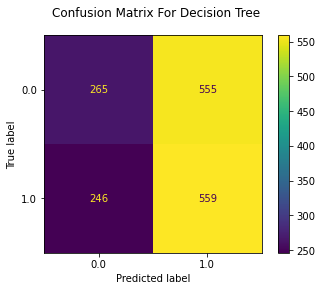

              precision    recall  f1-score   support

         0.0       0.48      0.49      0.49       820
         1.0       0.47      0.47      0.47       805

    accuracy                           0.48      1625
   macro avg       0.48      0.48      0.48      1625
weighted avg       0.48      0.48      0.48      1625



In [57]:

from sklearn.metrics import confusion_matrix
import time
start_time = time.time()
dtc_model = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=5, min_samples_split =4) #decision tree

#dtc_model = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_split=8, splitter='random')


dtc_model.fit(encodedx, encodedy.ravel())
#cross validation score ----------------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
encodedy = np.ravel(encodedy)
cv_scores = cross_val_score(dtc_model, encodedx, encodedy, cv =10)
print(cv_scores)
print('sv_scores.mean:{}'.format(np.mean(cv_scores)))


print("--- %s seconds ---" % (time.time() - start_time))
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import plot_confusion_matrix
fig = plot_confusion_matrix(dtc_model, x_test, y_test)
fig.figure_.suptitle("Confusion Matrix For Decision Tree")
plt.show()
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

score 0.9735384615384616
 
Classification Report:
 
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       820
         1.0       0.99      0.96      0.97       805

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625

 
Confusion Matrix:


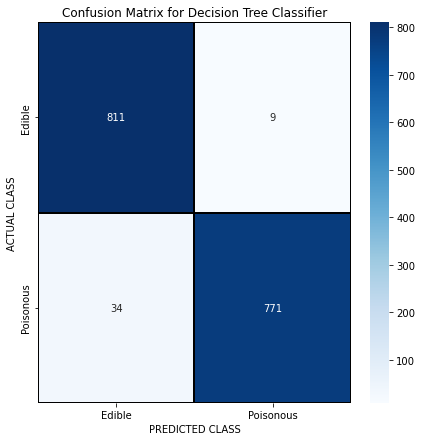

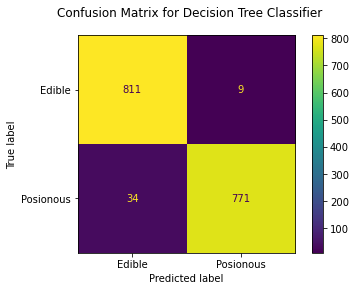

score 1.0
 
Classification Report:
 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       820
         1.0       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

 
Confusion Matrix:


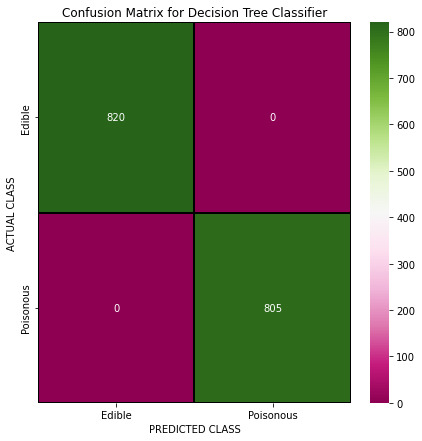

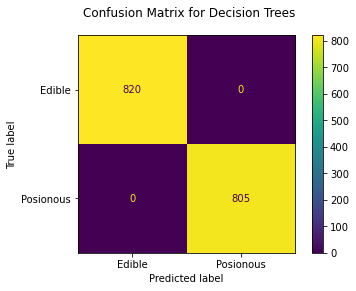

0.9107692307692308
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92       820
         1.0       0.97      0.85      0.90       805

    accuracy                           0.91      1625
   macro avg       0.92      0.91      0.91      1625
weighted avg       0.92      0.91      0.91      1625



In [17]:
import pandas as pd 
from sklearn.metrics import confusion_matrix
names = ["edible","cap-shape","cap-surface", "cap-color","bruises","odor","gill-attachment","gill-spacing","gill-size","gill-color","stalk-shape","stalk-root","stalk-surface-above-ring","stock-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","viel-type","viel-color","ring number","ring-type","spore-print-color","population","habitat"]
import seaborn as sns
dataset = pd.read_csv('mush.csv',names = names)
#dataset.head()

from ctypes import PyDLL
import pandas as pd #need pandas to store data and dataframe 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder #to convert strings to numbers
from sklearn.tree import DecisionTreeClassifier #DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC #support vector classifier
from sklearn.metrics import classification_report #evaluation matrix 
from sklearn.metrics import accuracy_score #accuracy score

enc = OrdinalEncoder()
X = dataset.drop('edible', axis=1) #corresponding attributes 
y = dataset['edible'] #corresponding label (trying to predict)
#print(x.head)
#print(y.head)
y = y.values.reshape(-1,1)

encodedx = enc.fit_transform(X)
#print(encodedx)
encodedy = enc.fit_transform(y)
#print(encodedy)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encodedx, encodedy, test_size=0.2,random_state=1)

#model = DecisionTreeClassifier() #decision tree
#model = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_split=8, splitter='random') #decision tree
#model = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=4, splitter='random') #decision tree
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=4, splitter='best') #decision tree
model.fit(X_train, y_train) #train
predictions = model.predict(X_test) #predict
score = accuracy_score(y_test,predictions)
print("score",score)
print(" ")
#print("Classification Report (criterion='entropy', max_depth=5, min_samples_split=4, splitter='best'):")
print("Classification Report:")
print(" ")
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
print(" ")
#print("Confusion Matrix (criterion='entropy', max_depth=5, min_samples_split=4, splitter='best'):")
print("Confusion Matrix:")
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED CLASS")
plt.ylabel("ACTUAL CLASS")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.savefig("dtcm1.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

fig = plot_confusion_matrix(model, X_test, y_test, display_labels=("Edible","Posionous"))
fig.figure_.suptitle("Confusion Matrix for Decision Tree Classifier")
plt.show()
#model = DecisionTreeClassifier() #decision tree
model = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_split=8, splitter='random') #decision tree
#model = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=4, splitter='random') #decision tree
#model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=4, splitter='best') #decision tree
model.fit(X_train, y_train) #train
predictions = model.predict(X_test) #predict
score = accuracy_score(y_test,predictions)
print("score",score)
print(" ")
#print("Classification Report (criterion='gini', max_depth=15, min_samples_split=8, splitter='random'):")
print("Classification Report:")
print(" ")
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
print(" ")
#print("Confusion Matrix (criterion='gini', max_depth=15, min_samples_split=8, splitter='random'):")
print("Confusion Matrix:")
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="PiYG", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED CLASS")
plt.ylabel("ACTUAL CLASS")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.savefig("dtcm2.png", format='png', dpi=500, bbox_inches='tight')
plt.show()
fig = plot_confusion_matrix(model, X_test, y_test, display_labels=("Edible","Posionous"))
fig.figure_.suptitle("Confusion Matrix for Decision Trees")
plt.show()

from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
X, y = load_digits(return_X_y=True)
clf = Perceptron(tol=1e-3, random_state=0)
y_flat = np.ravel(y_train)
clf.fit(X_train, y_flat)
clf.score(X_train, y_flat)
predictions = clf.predict(X_test)
score = accuracy_score(y_test,predictions)
print(score)
print(classification_report(y_test, predictions))